<a href="https://colab.research.google.com/github/JebediahDean/IS_4487_Tokyo/blob/main/Jeb_day4_lab_megatelco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 4 Lab, IS 4487

This lab is designed specifically to prepare you to complete the project assignment for today. We will go through code (using the MegaTelCo data as an example) that you will be able to adapt for the AdviseInvest project. Here is what you need to be able to do for the project assignment:

1. Identify the target variable for the analysis based on the business problem.
2. Clean the data by removing NAs, and filtering out rows with incorrect values.
3. Identify and recode features that should be categorical (AKA factor) variables.
4.  Compute the mean of a binary variable.



# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive


# Load Data


In [2]:
mtc = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")


# Tasks

## 1. Clean and Prepare the Data

 First, check to see if there are problems. Create some data summaries.

In [3]:
mtc.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389


In [4]:
mtc.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


In [5]:
#Removing Nulls

In [6]:
mtc.isnull().sum()

college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  0
over_15mins_calls_per_month    3
average_call_duration          0
reported_satisfaction          0
reported_usage_level           0
considering_change_of_plan     0
leave                          0
id                             0
dtype: int64

In [7]:
mtc=mtc.dropna()

In [8]:
#Removing Negatives

In [9]:
mtc_cleaning = mtc[mtc["income"]>0]
mtc_cleaning = mtc_cleaning[mtc_cleaning["house"]>0]

In [10]:
mtc_cleaning.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4995.000000,4995.000000,4995.000000,4995.000000,4.995000e+03,4995.000000,4995.000000,4995.000000
mean,79911.993994,85.146947,24.250450,493909.153754,7.879860e+02,7.743143,5.956557,10033.746747
std,41679.547320,85.631736,26.844655,253587.171573,2.829706e+04,8.806234,4.389560,5814.720956
min,20028.000000,0.000000,0.000000,150305.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.000000,0.000000,0.000000,260754.000000,2.190000e+02,1.000000,2.000000,4945.000000
50%,74966.000000,59.000000,15.000000,451898.000000,3.220000e+02,4.000000,5.000000,10125.000000
75%,115486.000000,177.000000,42.000000,701610.500000,5.280000e+02,14.000000,9.000000,15081.500000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


In [12]:
#Removing Outliers

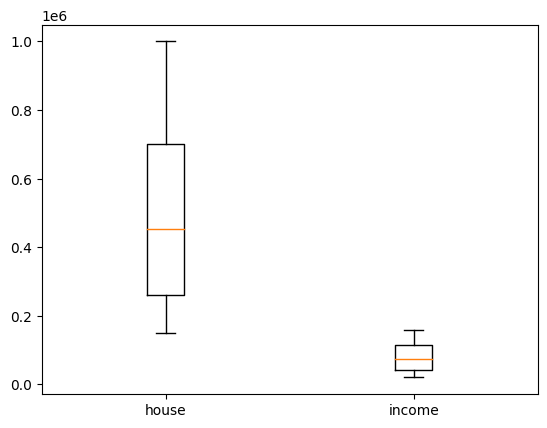

In [13]:
plt.boxplot([mtc_cleaning["house"], mtc_cleaning["income"]], labels=["house", "income"])
plt.show()

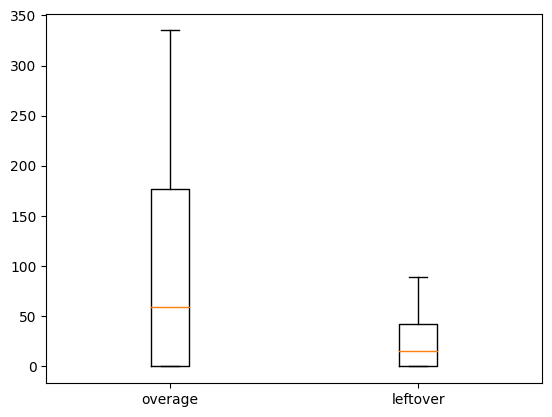

In [14]:
plt.boxplot([mtc_cleaning["overage"], mtc_cleaning["leftover"]], labels=["overage","leftover"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x79813c993970>,
 'caps': [<matplotlib.lines.Line2D at 0x79813c979d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x79813c992230>],
 'medians': [<matplotlib.lines.Line2D at 0x79813c979fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79813c8dbfa0>],
 'means': []}

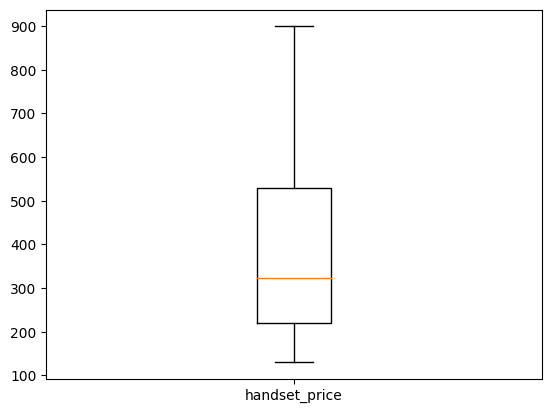

In [19]:
plt.boxplot([mtc_cleaning["handset_price"]], labels=["handset_price"])


In [17]:
mtc_cleaning = mtc_cleaning[mtc_cleaning["handset_price"]<10000]

In [18]:
mtc_cleaning.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,79911.270525,85.114738,24.244694,493946.252903,387.616340,7.739287,5.957549,10032.925110
std,41683.689543,85.610045,26.844259,253599.007645,213.659555,8.802897,4.389439,5815.013219
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41591.500000,0.000000,0.000000,260741.500000,219.000000,1.000000,2.000000,4943.000000
50%,74962.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10124.000000
75%,115497.000000,177.000000,42.000000,701612.250000,528.000000,14.000000,9.000000,15082.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


In [ ]:
# Your code goes here.  Add additional code chunks as necessary.
## see above

Go ahead and filter the data set as appropriate based on what you see in your summary tables..

In [ ]:
# Your code goes here
## see above

Check that it worked.

In [ ]:
# Your code goes here
## see above

**Remove Missing Values**

Does this dataset have ann missing values -- NAs?

We could use the `.info` funtion to derive this information.

We could also use the `.isna()` function. (`.isnull()` is also a possibility.) Combined with `.sum()` we can obtain a count of NAs in the dataset. (This is actually another instance of a boolean mask since `is.na()` evaluates as `True`/`False`.  Then `sum()` counts up the instances of `True`. This works because Python treats `True` as 1 and `False` as 0.)

Name your cleaned dataset `mtc_clean`.

In [20]:
# Your code goes here
mtc_clean = mtc_cleaning.copy()

Notice that this method gives a column-wise count.  It appears there are indeed 3 NAs in the `over_15mins_calls_per_month` column. How do we remove them? Use the `.dropna()` function (we talked about this in the last lab) and overwrite the `mtc_clean` data frame with the version from which the NAs have been removed.

In [ ]:
# your code goes here
## see above

In [ ]:
# check that it worked
## see above

**Create Categorical Variables**

Which variables represent categories? Let's get an overview of the data again to assist in making that determination.

In [ ]:
# Look at the top rows
## see above

- `college` is currently coded `zero`/`one`.  This should be recoded as 0/1.  We will ignore this for now.
- `reported_satisfaction` is a category.
- `reported_usage_level` is a category.
- `considering_change_of_plan` is a category.
-	`leave` is a category.

We will use the `astype()` function to do the transformation, with the following syntax:  `data['column'] = data['column'].astype('category')`.

In [21]:
# Convert the above to categorical variables
mtc['reported_satisfaction'] = mtc['reported_satisfaction'].astype('category')
mtc["reported_usage_level"] = mtc["reported_usage_level"].astype('category')
mtc["considering_change_of_plan"] = mtc["considering_change_of_plan"].astype('category')
mtc["leave"] = mtc["leave"].astype('category')

In [22]:
# Check that it worked
mtc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4997 non-null   object  
 1   income                       4997 non-null   int64   
 2   overage                      4997 non-null   int64   
 3   leftover                     4997 non-null   int64   
 4   house                        4997 non-null   int64   
 5   handset_price                4997 non-null   int64   
 6   over_15mins_calls_per_month  4997 non-null   float64 
 7   average_call_duration        4997 non-null   int64   
 8   reported_satisfaction        4997 non-null   category
 9   reported_usage_level         4997 non-null   category
 10  considering_change_of_plan   4997 non-null   category
 11  leave                        4997 non-null   category
 12  id                           4997 non-null   int64   
dtypes: categ

## 2. Identify the target

The target variable is the data representation of the phenomenon, we are interested in predicting or explaining. In this case, customers are churning. This represents a problem for the business, something we would like to improve. Hence the churn variable, `leave`, will be the target.

The target variable will always depend on the specific business context in which the analysis is taking place.


## 3. Compute the mean of a binary variable  

What is the proportion of people who churned? There are lots of ways of answering this question.  But here is a straightforward approach based on the idea of (again) using a boolean mask.  `leave` is categorical (`LEAVE`/`STAY`) but we can make it into `True`/`False` in order to compute the mean.

Remember that a *proportion* is a number between 0 and 1, while a *percentage* is a number between 0 and 100.



In [24]:
# Here is the mask
proportion = mtc_clean['leave'] == "LEAVE"

In [26]:
proportion.sum()/len(proportion)

0.4941930316379656

We can use the mask to calculate a proportion. This works, again, because Python treats `True` as 1 and `False` as 0.

Here's an example:

In [27]:
series = pd.Series([True, False, True, False, True]) # 3/5 True = .6 or 60%
series


0     True
1    False
2     True
3    False
4     True
dtype: bool

In [28]:
series.mean() * 100 # should be 60%

60.0

## Compute the proportion of MegaTelCo customers who churned

Use a boolean mask to create a series of `True/`False` then calculate the mean of the logical series

In [29]:
# Write your code here
## see above

49.419303163796556

# Summary of Functions



- `pd.read_csv()`: Reads a CSV file into a pandas DataFrame.
- `.isna()`: Checks for missing values in a DataFrame or Series.
- `.sum()`: Calculates the sum of values in a Series or DataFrame.
- `.dropna()`: Removes rows with missing values from a DataFrame.
- `.astype()`: Converts the data type of a DataFrame column.
- `.info()`: Prints a concise summary of a DataFrame.
- `.mean()`: Calculates the average of values in a Series or DataFrame.
- `.groupby()`: Groups DataFrame.




